In [1]:
import pandas as pd
from tqdm import tqdm
from dateutil.parser import parse

In [2]:
df=pd.read_csv('dataset_bugtype.csv')

In [3]:
#df['project'].unique().tolist()

In [4]:
def convert_date(x):
    x=parse(x)
    return x

In [ ]:
tqdm().pandas()

In [6]:
df['date']=df['date'].progress_apply(convert_date)

100%|██████████| 16205973/16205973 [24:06<00:00, 11202.36it/s]


In [8]:
#removing some invalid records
df=df[~(df['date']<parse('1990-01-01 00:00:00+00:00'))]
df=df[~(df['date']>parse('2019-12-13 00:00:00+00:00'))]
df=df[~(df['commit_insertion']=='mono/mono')]

In [11]:
df.dtypes

date                object
commiter            object
commit_insertion     int64
commit_deletion      int64
file_language       object
filename            object
sha_x               object
message             object
project             object
github_language     object
bugfix               int64
Algo                 int64
Conc                 int64
Mem                  int64
Prog                 int64
Fail                 int64
Perf                 int64
Sec                  int64
dtype: object

In [12]:
df['commiter']=df['commiter'].astype(str)
df['commit_insertion']=df['commit_insertion'].astype(int)


In [13]:
df.head()

,date,commiter,commit_insertion,commit_deletion,file_language,filename,sha_x,message,project,github_language,bugfix,Algo,Conc,Mem,Prog,Fail,Perf,Sec
0,2019-12-11 13:29:19+01:00,Oliver Eyton-Williamsojeytonwilliams@gmail.com,14,4,JavaScript,client/src/templates/Challenges/utils/frame.js,d6c53eb9142d1986e15b09435cb1191bd35c3aae,fix(client): report cross origin errors (#...,freeCodeCamp/freeCodeCamp,JavaScript,1,0,0,0,1,1,0,0
1,2019-12-11 06:43:06-05:00,Catalinaionescuc@dickinson.edu,20,9,JavaScript,api-server/common/models/user.js,e154f38118be44b49e9a6a99dd88c447d008f9ac,added displayusername and username update ...,freeCodeCamp/freeCodeCamp,JavaScript,1,0,0,0,1,1,0,0
2,2019-12-11 06:43:06-05:00,Catalinaionescuc@dickinson.edu,14,11,JavaScript,api-server/server/boot/settings.js,e154f38118be44b49e9a6a99dd88c447d008f9ac,added displayusername and username update ...,freeCodeCamp/freeCodeCamp,JavaScript,1,0,0,0,1,1,0,0
3,2019-12-11 06:43:06-05:00,Catalinaionescuc@dickinson.edu,1,0,JavaScript,api-server/server/utils/auth.js,e154f38118be44b49e9a6a99dd88c447d008f9ac,added displayusername and username update ...,freeCodeCamp/freeCodeCamp,JavaScript,1,0,0,0,1,1,0,0
4,2019-12-11 06:43:06-05:00,Catalinaionescuc@dickinson.edu,1,0,JavaScript,api-server/server/utils/publicUserProps.js,e154f38118be44b49e9a6a99dd88c447d008f9ac,added displayusername and username update ...,freeCodeCamp/freeCodeCamp,JavaScript,1,0,0,0,1,1,0,0


/home/sarim/anaconda3/envs/deep/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


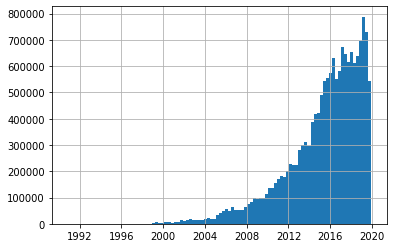

In [14]:
df['date'].hist(bins=100)

In [15]:
df['commits']=[1 for i in range(len(df))]

In [16]:
languages=df['github_language'].unique()
languages

array(['JavaScript', 'Python', 'Ruby', 'Java', 'PHP', 'C', 'C++',
       'Objective-C', 'C#', 'Perl', 'Go', 'CoffeeScript', 'Assembly',
       'TypeScript', 'Swift', 'Scala', 'Lua'], dtype=object)

In [17]:
df['file_language'].unique()

array(['JavaScript', 'TypeScript', 'CoffeeScript', 'C++', 'Ruby',
       'Python', 'C', 'Objective-C', 'Java', 'Lua', 'Perl', 'Assembly',
       'C#', 'PHP', 'Go', 'Scala', 'Swift'], dtype=object)

In [18]:
df.project.nunique()

626

In [19]:
def get_days(x):
    return (x.max()-x.min()).days

In [20]:
regression_dataset=df.groupby(['project','file_language']).agg(
{'commits' : 'sum',
 'bugfix' : 'sum',
 'Algo' : 'sum',
 'Conc' : 'sum',
 'Mem' : 'sum',
 'Prog' : 'sum',
 'Fail' : 'sum',
 'Perf' : 'sum',
 'Sec' : 'sum',
 'commit_insertion':'sum',
'commiter': 'nunique',
'date':get_days}).reset_index()
regression_dataset

,project,file_language,commits,bugfix,Algo,Conc,Mem,Prog,Fail,Perf,Sec,commit_insertion,commiter,date
0,0xd4d/dnSpy,C#,50992,5003,9,87,561,4346,2450,43,2510,660833,27,1314
1,30-seconds/30-seconds-of-code,JavaScript,9797,227,8,0,2,217,61,29,137,110986,66,741
2,AFNetworking/AFNetworking,C,1094,190,1,5,11,173,68,5,117,10243,112,3063
3,AFNetworking/AFNetworking,Objective-C,2493,654,6,43,62,543,344,7,303,38366,292,3069
4,AFNetworking/AFNetworking,Swift,18,4,0,0,0,4,0,0,4,300,2,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,zxing/zxing,C#,629,22,0,0,0,22,22,0,0,63181,4,1582
1831,zxing/zxing,C++,1666,153,0,0,52,101,153,0,0,87298,20,1990
1832,zxing/zxing,Java,8063,928,26,21,35,846,740,17,171,160422,82,4297
1833,zxing/zxing,Objective-C,846,111,0,0,55,56,102,0,9,18623,11,2104


In [21]:
regression_dataset.rename(columns = {'bugfix':'bcommits','commit_insertion':'tins','commiter':'devs','date':'max_commit_age'}, inplace = True) 

In [22]:
regression_dataset.describe()

,commits,bcommits,Algo,Conc,Mem,Prog,Fail,Perf,Sec,tins,devs,max_commit_age
count,1.835000e+03,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1.835000e+03,1835.000000,1835.000000
mean,8.831583e+03,1734.776022,24.221253,55.793460,155.300272,1499.461035,1054.208719,41.698093,638.869210,3.551835e+05,143.977112,2066.001635
std,4.573398e+04,10657.710623,220.383942,761.775757,2136.276206,7741.882989,8345.072795,384.557378,2356.317217,1.691957e+06,799.549263,1384.644922
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,9.250000e+01,10.000000,0.000000,0.000000,0.000000,9.000000,5.000000,0.000000,4.000000,2.888500e+03,7.000000,1138.000000
50%,6.970000e+02,109.000000,0.000000,1.000000,4.000000,99.000000,50.000000,1.000000,42.000000,2.405800e+04,27.000000,1802.000000
75%,4.348500e+03,774.000000,7.000000,13.000000,38.000000,690.000000,400.000000,12.000000,317.500000,1.448280e+05,98.000000,2777.000000
max,1.693978e+06,414281.000000,8940.000000,32078.000000,89709.000000,283554.000000,336756.000000,15055.000000,62470.000000,4.253909e+07,26529.000000,10650.000000


In [23]:
regression_dataset.to_csv('regression.csv',index=False)

In [24]:
#we remove two languages for now
df=df[~(df['file_language'].isin(['TypeScript','Assembly']))]
df.drop_duplicates('file_language')['file_language'].tolist()

['JavaScript',
 'CoffeeScript',
 'C++',
 'Ruby',
 'Python',
 'C',
 'Objective-C',
 'Java',
 'Lua',
 'Perl',
 'C#',
 'PHP',
 'Go',
 'Scala',
 'Swift']

In [25]:
#Assembly=['Procedural', 'Untyped', 'Managed'] 
lang={
    'C#':'Procedural_Static_Disallow_Managed',
    'JavaScript':'Scripting_Dynamic_Allow_Managed',
    'C':'Procedural_Static_Allow_Unmanaged',
    'Objective-C':'Procedural_Static_Allow_Unmanaged',
    'Swift':'Functional_Static_Disallow_Managed',
    'C++':'Procedural_Static_Allow_Unmanaged',
    'Python':'Scripting_Dynamic_Disallow_Managed',
    'CoffeeScript':'Scripting_Dynamic_Allow_Managed',
    'Java':'Procedural_Static_Disallow_Managed',
    'PHP':'Scripting_Dynamic_Allow_Managed',
    'Ruby':'Scripting_Dynamic_Disallow_Managed',
    'Lua':'Procedural_Dynamic_Allow_Managed',
    'Perl':'Scripting_Dynamic_Allow_Managed',
    'Go':'Procedural_Static_Disallow_Managed',
    'Scala':'Functional_Static_Disallow_Managed'
    
     }

In [26]:
def classify(x):
    return lang[x['file_language']]

In [27]:
df['class']=df.apply(classify,axis=1)

In [28]:
regression_dataset=df.groupby(['project','class']).agg(
{'commits' : 'sum',
 'bugfix' : 'sum',
 'Algo' : 'sum',
 'Conc' : 'sum',
 'Mem' : 'sum',
 'Prog' : 'sum',
 'Fail' : 'sum',
 'Perf' : 'sum',
 'Sec' : 'sum',
 'commit_insertion':'sum',
'commiter': 'nunique',
'date':get_days}).reset_index()
regression_dataset

,project,class,commits,bugfix,Algo,Conc,Mem,Prog,Fail,Perf,Sec,commit_insertion,commiter,date
0,0xd4d/dnSpy,Procedural_Static_Disallow_Managed,50992,5003,9,87,561,4346,2450,43,2510,660833,27,1314
1,30-seconds/30-seconds-of-code,Scripting_Dynamic_Allow_Managed,9797,227,8,0,2,217,61,29,137,110986,66,741
2,AFNetworking/AFNetworking,Functional_Static_Disallow_Managed,18,4,0,0,0,4,0,0,4,300,2,369
3,AFNetworking/AFNetworking,Procedural_Static_Allow_Unmanaged,3587,844,7,48,73,716,412,12,420,48609,337,3069
4,Alamofire/Alamofire,Functional_Static_Disallow_Managed,2364,450,1,17,14,418,350,8,92,67111,121,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,ytdl-org/youtube-dl,Scripting_Dynamic_Disallow_Managed,20402,4733,21,10,84,4618,2138,25,2570,299470,806,2939
1265,yuki-kimoto/gitprep,Scripting_Dynamic_Allow_Managed,1294,101,1,1,4,95,53,0,48,36824,6,2036
1266,zxing/zxing,Procedural_Static_Allow_Unmanaged,4563,392,0,0,167,225,375,0,17,143309,21,2104
1267,zxing/zxing,Procedural_Static_Disallow_Managed,8692,950,26,21,35,868,762,17,171,223603,84,4297


In [29]:
regression_dataset.rename(columns = {'bugfix':'bcommits','commit_insertion':'tins','commiter':'devs','date':'max_commit_age'}, inplace = True) 

In [30]:
regression_dataset.describe()

,commits,bcommits,Algo,Conc,Mem,Prog,Fail,Perf,Sec,tins,devs,max_commit_age
count,1.269000e+03,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1.269000e+03,1269.000000,1269.000000
mean,1.203683e+04,2345.559496,33.138692,78.511426,219.732861,2014.176517,1436.550039,57.642238,851.367218,4.672501e+05,178.347518,2182.810875
std,5.540651e+04,12794.910784,264.893121,917.052787,2579.037252,9261.065276,10054.694081,464.466287,2769.964403,1.927732e+06,883.637460,1380.137301
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,1.830000e+02,21.000000,0.000000,0.000000,0.000000,20.000000,10.000000,0.000000,6.000000,6.272000e+03,10.000000,1267.000000
50%,1.322000e+03,221.000000,1.000000,2.000000,8.000000,195.000000,100.000000,2.000000,94.000000,4.284100e+04,39.000000,1938.000000
75%,7.094000e+03,1196.000000,11.000000,21.000000,58.000000,1081.000000,605.000000,21.000000,514.000000,2.347950e+05,136.000000,2911.000000
max,1.694098e+06,414313.000000,8940.000000,32080.000000,89712.000000,283581.000000,336784.000000,15055.000000,62474.000000,4.254241e+07,26531.000000,10650.000000


In [31]:
regression_dataset.to_csv('regression_class.csv',index=False)